<a href="https://colab.research.google.com/github/Kyoung-mii/DeepLearning/blob/main/06_DeepConvolutionalNeuralNetwork/6_1LeNet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6.1 LeNet-5

## 코드 6-1 [1] 패키지 불러오기

In [48]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Layer
#from keras import backend as K
import numpy as np

## 코드 6-1 [2] 데이터 준비하기

In [49]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

#이미지 형태로 변경
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

## 코드 6-1 [3] 데이터 패딩 및 정규화하기

In [50]:
# np.pad()로 이미지 상하좌우에 2픽셀의 0 값으로 이루어진 패딩 추가
x_train = np.pad(x_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
x_test = np.pad(x_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')
x_train = x_train / 255
x_test = x_test/ 255

In [51]:
print(x_train.shape, x_test.shape)

(60000, 32, 32, 1) (10000, 32, 32, 1)


## 코드 6-1 [4] 레이블 데이터 벡터화하기

In [52]:
# one_hot encoding으로 변환
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


## 코드 6-1 [5] 방사형 기저 함수 클래스 구현하기

In [56]:
class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        #self.gamma = K.cast_to_floatx(gamma)
        self.gamma = tf.cast(gamma, tf.float32)


    def build(self, input_shape):
        self.mu = self.add_weight(name = 'mu',
                                  shape = (int(input_shape[1]), self.units),
                                  initializer = 'uniform',
                                  trainable = True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        #diff = K.expand_dims(inputs) - self.mu
        diff = tf.expand_dims(inputs, axis=-1) - self.mu
        #l2 = K.sum(K.pow(diff, 2), axis = 1)
        l2 = tf.reduce_sum(tf.square(diff), axis = 1)
        #res = K.exp(-1 * self.gamma * l2)
        res = tf.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

## 코드 6-1 [6] 모델 정의하기

In [57]:
model = Sequential()
model.add(Conv2D(6, kernel_size = (5, 5), activation = 'tanh',
                 input_shape = (32, 32, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(16, kernel_size = (5, 5), activation = 'tanh'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(120, activation = 'tanh'))
model.add(Dense(84, activation = 'tanh'))
model.add(RBFLayer(10, 0.5))

model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rbf_layer_7 (RBFLayer)          │ (None, 10)             │           840 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,696 (241.00 KB)

 Trainable params: 61,696 (241.00 KB)

 Non-trainable params: 0 (0.00 B)

## 코드 6-1 [7] 학습하기

In [60]:
model.compile(loss = 'mean_squared_error',
              optimizer = keras.optimizers.Adam(), metrics = ['accuracy'])
history = model.fit(x_train, y_train, epochs = 20, verbose = 1,
          validation_data = (x_test, y_test))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9961 - loss: 9.7775e-04 - val_accuracy: 0.9866 - val_loss: 0.0024
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9963 - loss: 9.5416e-04 - val_accuracy: 0.9879 - val_loss: 0.0023
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9966 - loss: 8.6895e-04 - val_accuracy: 0.9869 - val_loss: 0.0023
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9967 - loss: 8.2358e-04 - val_accuracy: 0.9860 - val_loss: 0.0025
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9964 - loss: 9.0349e-04 - val_accuracy: 0.9860 - val_loss: 0.0025
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9964 - loss: 8.4619e-04 - val_accuracy: 0.9860 - val_loss: 0.0024
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9965 - loss: 8.1893e-04 - val_accuracy: 0.9855 - val_loss: 0.0024
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accur

## 코드 6-1 [8] 정확도 확인하기


In [61]:
score = model.evaluate(x_test, y_test)
print('테스트 정확도:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9850 - loss: 0.0027
테스트 정확도: 0.9890000224113464


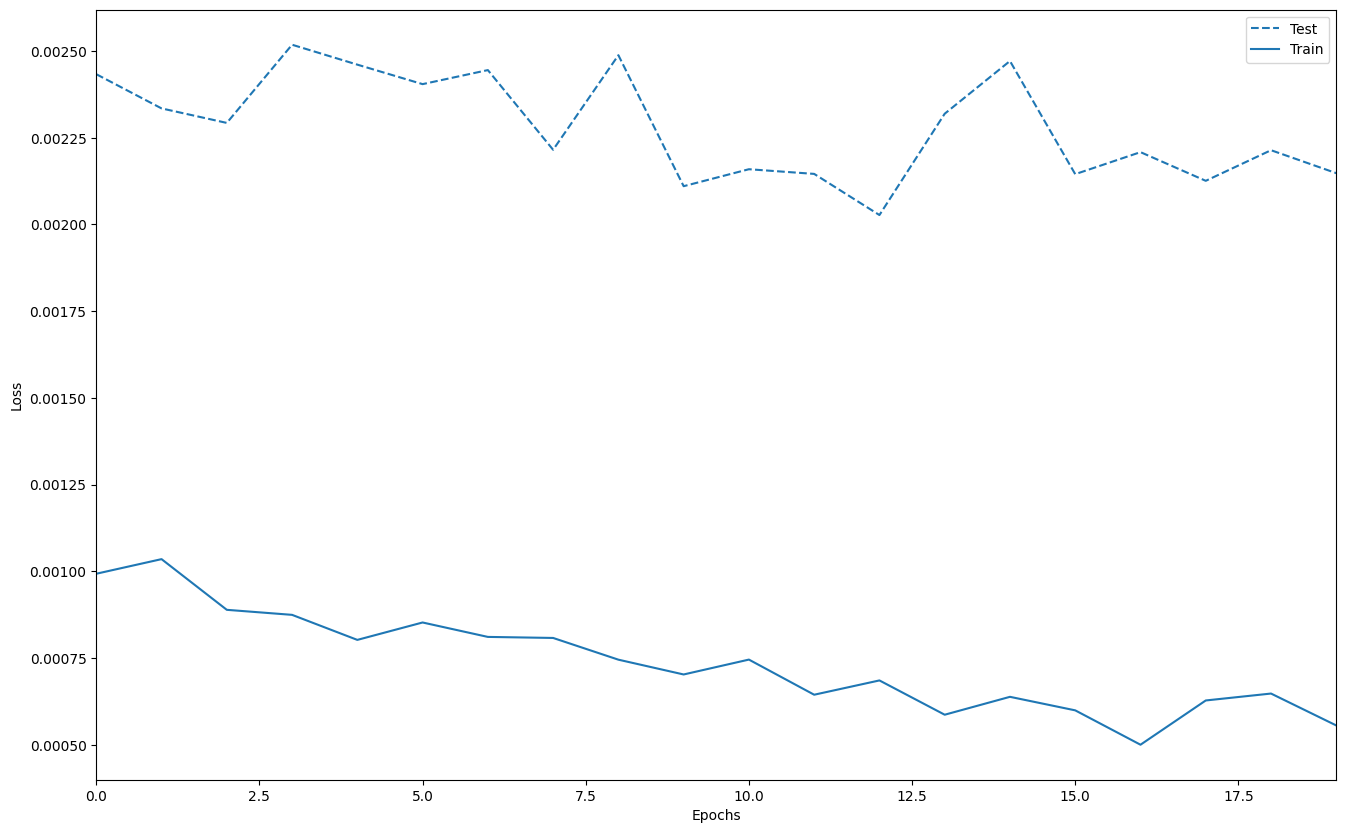

In [62]:
import matplotlib.pyplot as plt
def plot_loss(history):
    plt.figure(figsize = (16, 10))
    val = plt.plot(history.epoch, history.history['val_loss'],
                   '--', label = 'Test')
    plt.plot(history.epoch, history.history['loss'],
                   color = val[0].get_color(), label = 'Train')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.xlim([0, max(history.epoch)])
plot_loss(history)